# Midterm - Problem 5 (Gradient Method and Nesterov's Accelerated Gradient Method)

Consider the function: $f(x)=1+4x_1+6(x_1^2+x_2^2)+4x_1x_2, \ x=[x_1,x_2]^T.$
Use the starting point $x=[10,10]^T$ write a Python program to find an approximation of the optimal solution to the problem using the gradient method and Nesterov's accelerated gradient method with a fixed step size $\alpha=0.01$. Terminate the algorithm when the gradient of $f$ is less than $10^-4.$ Plot the function value at each iteration for both methods on the same graph and display the number of iterations needed for each method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

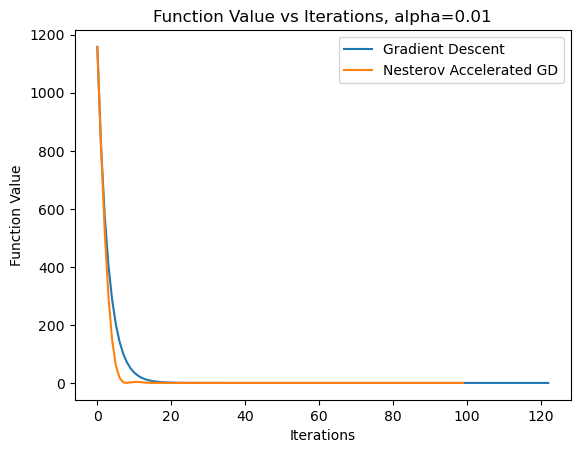

Gradient Descent:
Optimal Solution: [-0.37499121  0.12499122]
Number of Iterations: 123

Nesterov Accelerated Gradient Descent:
Optimal Solution: [-0.37498872  0.12499362]
Number of Iterations: 100


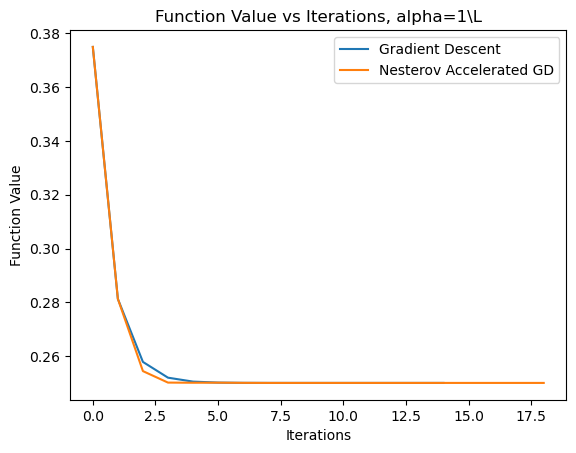

Gradient Descent:
Optimal Solution: [-0.37499237  0.12499237]
Number of Iterations: 15

Nesterov Accelerated Gradient Descent:
Optimal Solution: [-0.37499302  0.12499302]
Number of Iterations: 19


In [8]:
# Define the function and its gradient
def f(x):
    x1, x2 = x
    return 1 + 4*x1 + 6*(x1**2 + x2**2) + 4*x1*x2

def grad_f(x):
    x1, x2 = x
    df_dx1 = 4 + 12*x1 + 4*x2
    df_dx2 = 12*x2 + 4*x1
    return np.array([df_dx1, df_dx2])

# Gradient Descent
def gradient_descent(x0, alpha, tol):
    x = x0
    f_values = []
    iterations = 0
    while True:
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        x = x - alpha * grad
        f_values.append(f(x))
        iterations += 1
    return x, f_values, iterations

# Nesterov Accelerated Gradient Descent
def nesterov_accelerated_gradient_descent(x0, alpha, tol):
    x = x0
    y = x0
    f_values = []
    iterations = 0
    while True:
        grad = grad_f(y)
        if np.linalg.norm(grad) < tol:
            break
        x_new = y - alpha * grad
        y = x_new + (iterations / (iterations + 3)) * (x_new - x)
        x = x_new
        f_values.append(f(x))
        iterations += 1
    return x, f_values, iterations

# Initial point and parameters
x0 = np.array([10, 10])
alpha = 0.01
tol = 1e-4

# Gradient Descent (alpha = 0.01)
optimal_x_gd, f_values_gd, iterations_gd = gradient_descent(x0, alpha, tol)

# Nesterov Accelerated Gradient Descent (alpha = 0.01)
optimal_x_nag, f_values_nag, iterations_nag = nesterov_accelerated_gradient_descent(x0, alpha, tol)

# Plotting
plt.plot(range(len(f_values_gd)), f_values_gd, label='Gradient Descent')
plt.plot(range(len(f_values_nag)), f_values_nag, label='Nesterov Accelerated GD')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Function Value vs Iterations, alpha=0.01')
plt.legend()
plt.show()

print("Gradient Descent:")
print("Optimal Solution:", optimal_x_gd)
print("Number of Iterations:", iterations_gd)

print("\nNesterov Accelerated Gradient Descent:")
print("Optimal Solution:", optimal_x_nag)
print("Number of Iterations:", iterations_nag)

# Define the matrix A and new alpha value 
A = np.array([[12, 4],
              [4, 12]])
L = np.linalg.norm(A, ord=2)
alpha = 1 / L

# Gradient Descent (alpha=1/L)
optimal_x_gd, f_values_gd, iterations_gd = gradient_descent(x0, alpha, tol)

# Nesterov Accelerated Gradient Descent (alpha = 1/L)
optimal_x_nag, f_values_nag, iterations_nag = nesterov_accelerated_gradient_descent(x0, alpha, tol)

# Plotting
plt.plot(range(len(f_values_gd)), f_values_gd, label='Gradient Descent')
plt.plot(range(len(f_values_nag)), f_values_nag, label='Nesterov Accelerated GD')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.title('Function Value vs Iterations, alpha=1\L')
plt.legend()
plt.show()

print("Gradient Descent:")
print("Optimal Solution:", optimal_x_gd)
print("Number of Iterations:", iterations_gd)

print("\nNesterov Accelerated Gradient Descent:")
print("Optimal Solution:", optimal_x_nag)
print("Number of Iterations:", iterations_nag)


# Midterm - Problem 9 (SVM)

Use the dataset breastcancerwisconsin.csv. Allocate 80% of the dataset for training and reserve the remaining 20% for testing. Solve the support vector machine (SVM) problem using either the subgradient method or the stochastic subgradient method based on the training data. Then, evaluate the accuracy of your SVM model using the test data (the higher the better).

In [49]:
import pandas as pd
import csv
from sklearn.preprocessing import StandardScaler

In [88]:
# Import Data
df = pd.read_excel('breast_cancer_wisconsin.xls')
data_matrix = df.values
data_matrix = data_matrix[1:, 1:]
# Replace "M" with 1 and "B" with -1 in the first column
data_matrix[:, 0] = np.where(data_matrix[:, 0] == "M", 1, -1)
data_matrix = data_matrix.astype(float)


# Separate features and labels
X = data_matrix[:, 1:]  # features are all columns except the first
y = data_matrix[:, 0]  # label is in the first
num_data = data_matrix.shape[0]  # number of data points
n = data_matrix.shape[1] -1 # number of features (MAYBE COME BACK)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define train-test split ratio
train_ratio = 0.80
test_ratio = 0.20

# Calculate number of samples for training and testing
num_train_samples = int(train_ratio * num_data)
num_test_samples = num_data - num_train_samples


# Shuffle the dataset and split into training and testing sets
indices = np.random.permutation(num_data)
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

X_train, y_train = X_scaled[train_indices], y[train_indices]
X_test, y_test = X_scaled[test_indices], y[test_indices]

num_data_train = X_train.shape[0]  # number of data points in training set

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1

    def subgradient(w, b, X, y, n, num_data_train):
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data_train):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin

            if margin < 1:  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]

        return sgw, sgb

    while iteration < maxiter:
        if np.linalg.norm(sgw) < tol and np.linalg.norm(sgb) < tol:
            break
        else:
            sgw, sgb = subgradient(w, b, X, y, n, num_data_train)
            w -= alpha * (w + (C / num_data_train) * sgw)
            b -= alpha * (C / num_data_train) * sgb
            iteration += 1

        if iteration == maxiter:
            print("Maximum number of iterations reached.")
    return w, b

# Run subgradient method on training data
w, b = subgradient_method(X_train, y_train, n, num_data_train, tol=1e-4, maxiter=100, alpha=0.1, C=450)

# Compute predictions
predictions = np.sign(np.dot(X_test, w) + b)

# Compute accuracy
correct_predictions = np.sum(predictions == y_test)
accuracy = correct_predictions / len(y_test)
print("After doing Standard Rescaling of the Feature Parameters using sklearn.StandarScalar:")
print("Accuracy:", accuracy * 100, "%")

# Print the hyperplane equation
#print("Hyperplane equation: ⟨", w, ",", "x⟩ +", b, "= 0")

Maximum number of iterations reached.
After doing Standard Rescaling of the Feature Parameters using sklearn.StandarScalar:
Accuracy: 100.0 %
